# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Group Presentation 2**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Dataset 1 : Salary Data
We are using the Salary_Data dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/mohithsairamreddy/salary-data]

### Data Cleansing Process for User Data (Salaries) from a CSV File

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

file = "./Salary_Data.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 6704


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [13]:
df = df_unfiltered.dropna(axis=0, how='any')
print(df.info())
print(df.describe())
# Replace similar education levels to have uniformity
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "PhD": "phD"
})

print(df['Education Level'].unique())


<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB
None
               Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000


C:\Users\sreeh\AppData\Local\Temp\ipykernel_30912\419778864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace({


We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

### Statistical test - **One-way ANOVA**

By using the one-way ANOVA test, we can determine whether there are any statistically significant differences in the average salary across different education levels (Bachelor's, Master's, PhD, Highschool).

1. **Multiple Groups**: The dataset has more than two independent groups based on education level (Bachelor's, Master's, PhD). ANOVA is ideal when comparing means across three or more groups.
  
2. **Testing for Differences**: ANOVA helps determine whether there are statistically significant differences in the average salary across these education levels.
   
3. **Assumption of Normality**: The salaries are assumed to follow a normal distribution within each group, which aligns with the conditions for using ANOVA.

ANOVA effectively compares the variances between groups to see if any significant differences exist in their means.


### Null Hypothesis (H0)
Null Hypothesis (H0): There is no significant difference in salaries based on education level (Bachelor's, Master's, PhD, High School).

### Alternative Hypothesis (H1)
Alternative Hypothesis (H1): There is a significant difference in salaries based on education level (Bachelor's, Master's, PhD, High School).

F-statistic: 1630.9393525726196, P-value: 0.0


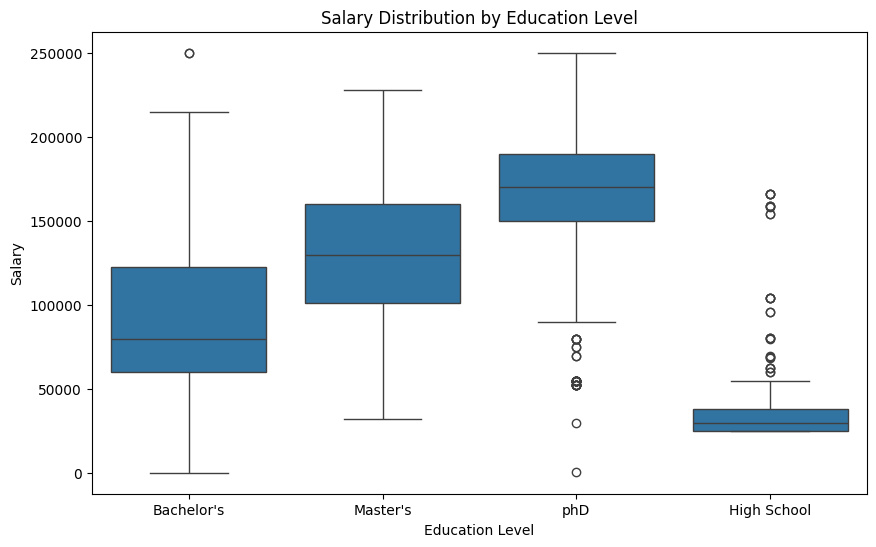

In [14]:
class SalaryAnalysis:
    def __init__(self, data):
        self.df = data

    def split_data_by_education(self):
        self.bachelors = self.df[self.df['Education Level'] == 'Bachelor\'s']['Salary']
        self.masters = self.df[self.df['Education Level'] == 'Master\'s']['Salary']
        self.phd = self.df[self.df['Education Level'] == 'phD']['Salary']
        self.high_school = self.df[self.df['Education Level'] == 'High School']['Salary']

    def perform_anova(self):
        self.split_data_by_education()
        f_stat, p_value = stats.f_oneway(self.bachelors, self.masters, self.phd, self.high_school)
        return f_stat, p_value

    def visualize_data(self):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Education Level', y='Salary', data=self.df)
        plt.title('Salary Distribution by Education Level')
        plt.show()

# Instantiate the class
analysis = SalaryAnalysis(df)

# Perform ANOVA
f_stat, p_value = analysis.perform_anova()
print(f'F-statistic: {f_stat}, P-value: {p_value}')

# Visualize the data
analysis.visualize_data()


### Summary
We conducted a one-way ANOVA to test whether there is a significant difference in salaries across different education levels (Bachelor's, Master's, PhD). The null hypothesis stated that there is no significant difference in salaries based on education, while the alternative hypothesis suggested that salaries do differ significantly. The analysis resulted in an F-statistic of 1630.94 and a p-value of 0.0. Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, indicating that there is a significant difference in salaries based on education level.

### Dataset 2 : Students Performance in Exams

We are using the Students Performance in Exams dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/spscientist/students-performance-in-exams]

We can use this to compare test scores between two groups, such as those who completed a test preparation course versus those who didn't. This will help us determine if the test preparation course had a significant impact on test scores.

In [15]:
data = './StudentsPerformance.csv'
student_df = pd.read_csv(data)

### Statistical test - **Two-sample Independent t-test**

We chose the Two-sample Independent t-test for the following reasons:

1. Comparing two groups: We're analyzing two distinct groups (students who completed test prep vs. those who didn't).

2. Independent samples: The groups are independent of each other.

3. Continuous dependent variable: We're measuring a continuous variable (math scores).

4. Normally distributed data: We assume the math scores are approximately normally distributed.

5. Equal variances: We assume the variances in both groups are approximately equal.

6. Hypothesis testing: We want to determine if there's a significant difference in mean scores between the groups.

This test helps us decide if the observed difference in math scores between the two groups is statistically significant or due to random chance.

### Null Hypothesis (H0)
Null Hypothesis (H0): There is no significant difference in mean test scores between students who completed the test preparation course and those who didn't.

### Alternative Hypothesis (H1)
Alternative Hypothesis (H1): There is a significant difference in mean test scores between students who completed the test preparation course and those who didn't.

T-statistic: -5.704616417349102
P-value: 1.5359134607147415e-08
Group means:
  none: 64.08
  completed: 69.70
The p-value (0.0000) is less than the significance level (0.05).
We reject the null hypothesis. There is a significant difference between the groups.


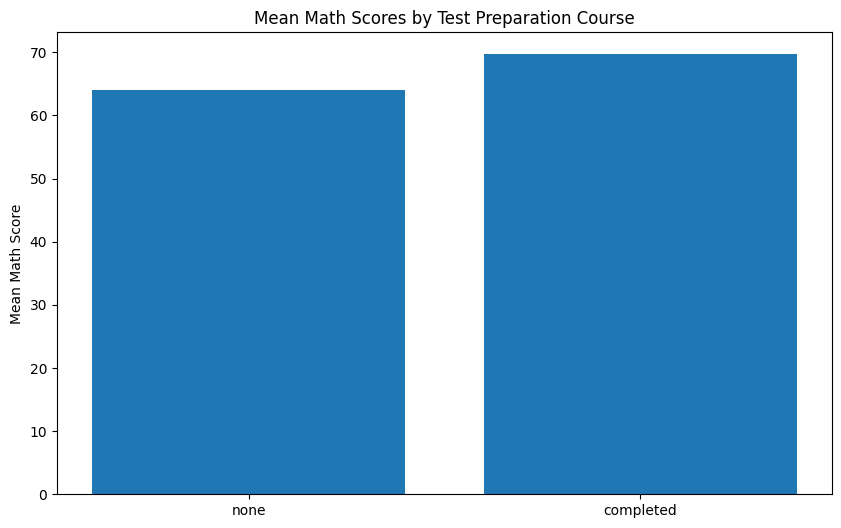

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def calculate_p_value(df, group_column, test_column):
    """
    Calculate p-value using Two-Sample Independent T-test.
    
    Parameters:
    df (pandas.DataFrame): The dataset
    group_column (str): The column name for grouping (e.g., 'test preparation course')
    test_column (str): The column name for the test scores (e.g., 'math score')
    
    Returns:
    tuple: t-statistic, p-value, and a dictionary of group means
    """
    # Ensure the group column has exactly two unique values
    unique_groups = df[group_column].unique()
    if len(unique_groups) != 2:
        raise ValueError(f"The {group_column} must have exactly two unique values.")
    
    # Split the data into two groups
    group1 = df[df[group_column] == unique_groups[0]][test_column]
    group2 = df[df[group_column] == unique_groups[1]][test_column]
    
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    
    # Calculate means for each group
    means = {unique_groups[0]: group1.mean(), unique_groups[1]: group2.mean()}
    
    return t_statistic, p_value, means

# Example usage:
if __name__ == "__main__":
    # Load the dataset
    df = pd.read_csv('StudentsPerformance.csv')
    
    # Calculate p-value
    t_stat, p_val, means = calculate_p_value(student_df, 'test preparation course', 'math score')
    
    # Print results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    print("Group means:")
    for group, mean in means.items():
        print(f"  {group}: {mean:.2f}")
    
    # Interpret results
    alpha = 0.05
    if p_val < alpha:
        print(f"The p-value ({p_val:.4f}) is less than the significance level ({alpha}).")
        print("We reject the null hypothesis. There is a significant difference between the groups.")
    else:
        print(f"The p-value ({p_val:.4f}) is not less than the significance level ({alpha}).")
        print("We fail to reject the null hypothesis. There is not significant evidence of a difference between the groups.")

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.bar(means.keys(), means.values())
    plt.title(f'Mean Math Scores by Test Preparation Course')
    plt.ylabel('Mean Math Score')
    plt.show()

### Summary
A Two-Sample Independent T-test was conducted to compare math scores between students who completed a test preparation course and those who did not. The analysis revealed a statistically significant difference (t = -5.70, p < 0.001) between the two groups. Students who completed the course scored higher (mean = 69.70) than those who did not (mean = 64.08). The extremely low p-value (1.54e-08) provides strong evidence to reject the null hypothesis, indicating that the test preparation course has a meaningful impact on math performance. This finding suggests that the course is effective in improving students' math scores and could be a valuable resource for enhancing academic achievement.